## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II


# Introducción a Sistemas de Recomendación

## Actividad 10


### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

## Actividad en grupos
### Nombres:
#### Carolina Padilla Hernández -201111402
#### Angie Paola Chacón -201012536
#### Juan Sebastian Rincón -201214767

**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.

En este cuadernos estudiaremos una primera introducción a los sistemas de recomendación, examinando un modelo de recomendación en base a la popularidad, sin ningún grado de personalización. En futuras actividades exploraremos otros sistemas basados en contenido o en filtrado colaborativo, los cuales toman en cuenta las preferencias de los usuarios. 

Los sistemas de recomendación están entre las aplicaciones más populares de la ciencia de datos actualmente. El marco que ofrecen estos sistemas permite representar modelos de decisión junto con métodos estadístico/computacionales para **aprender y estimar** las preferencias de los usuarios. 


## Introducción

En esta introducción vamos a construir un modelo simple basado en popularidad. Aprenderemos nociones que nos permitirán construir modelos más complejos de recomendación. 

En este cuaderno vamos a trabajar con una base de datos de películas IMDB (https://www.imdb.com/) 

En términos generales, los sistemas de recomendación pueden clasificarse en 3 tipos:

- **Recomendadores simples:** genera recomendaciones para cada usuario según la popularidad del ítem o producto. Por ejemplo, proponer películas o un género en base a su popularidad o su crítica, donde una buena crítica aproxima una mayor probabilidad de que la película sea apreciada por una audiencia "promedio".
- **Recomendadores basados en contenido:** sugiere elementos similares en función de un elemento en particular, como por ejemplo el género, la sinopsis o el reparto (actores, etc). De esta manera, si el usuario tiene unas preferencias específicas sobre un ítem/artículo en particular, también podría tener preferencia por un ítem *similar*.
- **Recomendadores por filtrado colaborativo:** estos sistemas generan recomendaciones a partir de similitudes entre usuarios, prediciendo la calificación o preferencia de un usuario sobre un ítem, o un grupo de atributos de dicho ítem, según las calificaciones y preferencias observadas de otros usuarios. 

Por último se puede considerar también un cuarto tipo de recomendadores, que son los de tipo **Híbrido**. Estos hacen referencia al uso simultaneo de las distintas metodologias antes señaladas y de múltiples fuentes de información o tecnologías específicas, como pueden ser las redes sociales o fuentes de información geográfica, demográfica, etc.

Para profundizar en los sistemas de recomendación se pueden consultar las siguientes fuentes:
- Ch. Aggarwal. Recommender Systems. Springer, 2016.
- J. Leskovec, A. Rajaraman, J. Ullman. Mining of Massive Datasets. Cambridge University Press (http://www.mmds.org/)


## 1. Sistema de recomendación simple

Los recomendadores simples generan recomendaciones basadas en su popularidad, de acuerdo con una *preferencia promedio*. 

La pregunta es,

**¿cómo medimos la popularidad de un producto/ítem?**

Una opción es la de elegir una métrica determinada para puntuar las películas, y en base a esa métrica generar un valor de preferencia por el ítem. De esta manera es posible consturir un *orden lineal* o un *ranking estricto* con las mejores películas de la base de datos IMDB.

Pasos a seguir:
- Elegir la métrica con la que se va a calificar cada película. Este punto también se puede entender como un modelo para estimar las preferencias por una película.
- Calcular el valor de preferencia sobre cada película.
- Ordenar las películas según su valor o puntuación y obtener una lista con las mejores k peliculas.

Manos a la obra, primero carguemos el conjunto de datos como un data frame en la bilbioteca Pandas:

In [1]:
# Importamos la biblioteca Pandas
import pandas as pd

# Cargamos los datos de peliculas de la base de datos IMDB
metadata = pd.read_csv('movies_metadata.csv', low_memory=False)

print(metadata.shape)
      
list(metadata)


(45466, 24)


['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [2]:
# Así se ven los datos
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
metadata[['original_title', 'popularity']][1:10]

,original_title,popularity
1,Jumanji,17.015539
2,Grumpier Old Men,11.7129
3,Waiting to Exhale,3.859495
4,Father of the Bride Part II,8.387519
5,Heat,17.924927
6,Sabrina,6.677277
7,Tom and Huck,2.561161
8,Sudden Death,5.23158
9,GoldenEye,14.686036


### Rating vs. Popularidad

Con esta información vamos a construir un sistema que recomiende películas basados directamente en su *rating*, o **voto promedio**. Sin embargo, es cierto que hay otro atributo relevante como lo es el de su **popularidad**. Por ejemplo, si un solo usuario califica con 10 una pelicula, pero 5000 usuarios le dan en promedio un 8.3, solo en base al rating la primera película sería considerada mejor que la segunda.


Bajo una perspectiva de *los grandes números*, la valoración o voto promedio de una película tiende a converger hacia un valor que refleje la calidad de la película a medida que el número de votos aumenta. Con poca información, o pocos votos, es más difícil estimar la calidad promedio de la película.  


Entonces, 

**¿qué tipo de métrica nos sirve para evaluar apropiadamente la preferencia por una película?** 

Tengamos en cuenta que en base a esta métrica se tendrán mejores o peores recomendaciones!




### Ejercicio 1.1

Examine los datos y proponga una métrica que permita estimar la preferencia promedio por una película.

**La base tiene información de 45466 películas y 24 variables que describen los atributos de las películas como género, presupuesto, género, idioma e información sobre su popularidad, cantidad de votos y calificación promedio de los usuarios. Adicional, se observa que 2899 películas no tienen registro votos, es decir el 6,3% de la base**

In [4]:
metadata.shape

(45466, 24)

In [5]:
metadata[metadata["vote_count"]==0].shape[0]/metadata.shape[0]

0.06376193199313773

In [6]:
# Películas sin votos
metadata[metadata["vote_count"]==0].shape

(2899, 24)

**Se valida el tipo de datos de cada variable, en el cual se observa que popularidad no es numérico, mientras votos y calificación promedio sí lo es**

In [7]:
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

**A continuación, se muestra la cantidad de missing values para cada variable**

In [8]:
#Variables con missing values
metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

**Se observa las pélículas tienen en promedio 109 votos. Sin embargo, al revisar la distribución de cantidad de votos por película, el 50% de las películas tienen menos de 10 votos y el 75% tienen menos de 34 votos. Es decir, que la cantidad de votos por película se encuentra sesgada hacia la derecha.**

In [9]:
print("Min votos",metadata['vote_count'].min())
print("Max votos",metadata['vote_count'].max())
metadata['vote_count'].describe()

Min votos 0.0
Max votos 14075.0


count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

C:\Users\angie\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\angie\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 200.0)

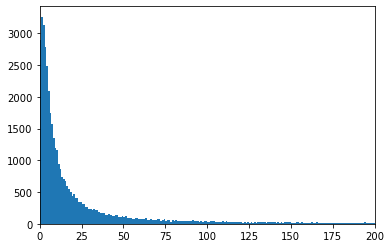

In [10]:
import matplotlib.pyplot as plt

plt.hist(metadata['vote_count'], bins =14075)
plt.xlim(0,200)

**En cuanto a la variable de *(vote average)* se observa que es una calificación que va de 0 a 10. En promedio las películas tienen una calificación promedio de 5,6, la mediana esta en 6 y el 6,3% de la base nunca han sido calificadas por los usuarios.**

In [11]:
print("Min votos",metadata['vote_average'].min())
print("Max votos",metadata['vote_average'].max())
metadata['vote_average'].describe()

Min votos 0.0
Max votos 10.0


count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

(0.0, 10.0)

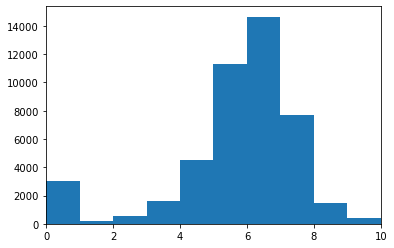

In [12]:
import matplotlib.pyplot as plt

plt.hist(metadata['vote_average'], bins =10)
plt.xlim(0,10)

In [13]:
metadata['vote_average'].max()

10.0

**Por otro lado, se convierte la variable de popularidad en float64, reemplazando los Na y el dato de "Beware of Frost Bote" con 0. Luego, al calcular el coeficiente de correlación de pearson entre las variables numéricas, se observa que la popularidad y la cantidad de votos están correlacionados al 0,5, es decir, de manera positiva y moderada**

In [14]:
import numpy as np
metadata['popularity_new'] = metadata['popularity'].fillna(0).str.replace('%','').replace('Beware Of Frost Bites',0).astype(np.float64)
print(metadata['popularity_new'].min())
print(metadata['popularity_new'].max())

0.0
547.488298


In [15]:
#La película más popular
metadata[metadata['popularity_new']==547.488298]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,popularity_new
30700,False,"{'id': 86066, 'name': 'Despicable Me Collectio...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,211672,tt2293640,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",...,1.156731e+09,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",Minions,False,6.4,4729.0,547.488298


In [16]:
metadata.corr()

,revenue,runtime,vote_average,vote_count,popularity_new
revenue,1.000000,0.103917,0.083868,0.812022,0.506179
runtime,0.103917,1.000000,0.158146,0.113539,0.129927
vote_average,0.083868,0.158146,1.000000,0.123607,0.154399
vote_count,0.812022,0.113539,0.123607,1.000000,0.559965
popularity_new,0.506179,0.129927,0.154399,0.559965,1.000000


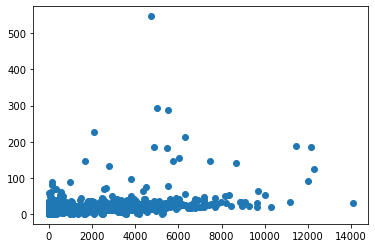

In [17]:
plt.scatter(metadata['vote_count'], metadata['popularity_new'], marker='o')

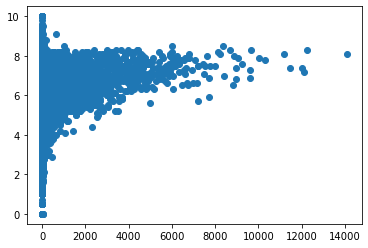

In [18]:
plt.scatter(metadata['vote_count'], metadata['vote_average'], marker='o');

**Dada que la mayoría de películas no tienen una gran cantidad de votos, no es posible simplemente ordenar las películas acorde a la calificación promedio ya que sería una métrica sesgada. Por lo tanto, se propone dos métrica una primera donde se pondera la cantidad de votos por la calificación promedio, y la segunda, igual a la primera pero se incluye la variable popularidad.**

### **MÉTRICA 1: valor promedio ponderado de votos * calificación promedio**

**Se calcula un promedio ponderado entre la cantidad de votos de una película y el total de votos de los usuarios, y luego se multiplica por la la calificación promedio**

In [27]:
metadata["vote_count"].sum()

4995933.0

In [28]:
metadata["score_ranking"]=(metadata["vote_count"]/metadata["vote_count"].sum())*metadata["vote_average"]
metadata["score_ranking"].sort_values(ascending=False)

15480    0.022820
12481    0.020383
22879    0.018138
17818    0.017774
14551    0.017458
           ...   
19730         NaN
29502         NaN
29503         NaN
35586         NaN
35587         NaN
Name: score_ranking, Length: 45466, dtype: float64

In [29]:
#Ranking
metadata[['original_title', 'homepage', 'vote_count', 'vote_average',"popularity_new","score_ranking"]].sort_values(ascending = False , by="score_ranking")[:15]

,original_title,homepage,vote_count,vote_average,popularity_new,score_ranking
15480,Inception,http://inceptionmovie.warnerbros.com/,14075.0,8.1,29.108149,0.022820
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,123.167259,0.020383
22879,Interstellar,http://www.interstellarmovie.net/,11187.0,8.1,32.213481,0.018138
17818,The Avengers,http://marvel.com/avengers_movie/,12000.0,7.4,89.887648,0.017774
14551,Avatar,http://www.avatarmovie.com/,12114.0,7.2,185.070892,0.017458
26564,Deadpool,http://www.foxmovies.com/movies/deadpool,11444.0,7.4,187.860492,0.016951
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,63.869599,0.016079
20051,Django Unchained,http://unchainedmovie.com/,10297.0,7.8,19.785025,0.016076
23753,Guardians of the Galaxy,http://marvel.com/guardians,10014.0,7.9,53.291601,0.015835
292,Pulp Fiction,NaN,8670.0,8.3,140.950236,0.014404


**En este caso las 4 películas más populares son Inception, the dark knight, interstellar y the avengers**

### **MÉTRICA 2: promedio ponderado de la cantidad de votos por 30% popularidad + 70% calificación promedio** 

**Se calcula un promedio ponderado entre la cantidad de votos y el total de votos de los usuarios, y luego se multiplica por 30% calificación promedio + 70% de la popularidad. Para lo anterior, primero se estandarizan las variables entre 0 y 1 y luego se calcula el ponderado**

In [30]:
metadata["popularity_new_st"]=metadata["popularity_new"]/metadata["popularity_new"].max()
metadata["vote_average_st"]=metadata["vote_average"]/metadata["vote_average"].max()

In [31]:
metadata["score_ranking_popu"]=((metadata["vote_count"]/metadata["vote_count"].sum())*metadata["popularity_new_st"])
metadata["score_ranking_cali"]=((metadata["vote_count"]/metadata["vote_count"].sum())*metadata["vote_average_st"])
metadata["score_ranking_pond"]=metadata["score_ranking_popu"]*0.7 + metadata["score_ranking_cali"]*0.3

In [33]:
#Ranking
metadata[['original_title', 'homepage', 'vote_count', 'vote_average',"popularity_new","score_ranking_popu", "score_ranking_cali", "score_ranking_pond"]].sort_values(ascending = False , by="score_ranking_pond")[:15]

,original_title,homepage,vote_count,vote_average,popularity_new,score_ranking_popu,score_ranking_cali,score_ranking_pond
14551,Avatar,http://www.avatarmovie.com/,12114.0,7.2,185.070892,0.000820,0.001746,0.001098
26564,Deadpool,http://www.foxmovies.com/movies/deadpool,11444.0,7.4,187.860492,0.000786,0.001695,0.001059
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,123.167259,0.000552,0.002038,0.000998
30700,Minions,http://www.minionsmovie.com/,4729.0,6.4,547.488298,0.000947,0.000606,0.000844
17818,The Avengers,http://marvel.com/avengers_movie/,12000.0,7.4,89.887648,0.000394,0.001777,0.000809
15480,Inception,http://inceptionmovie.warnerbros.com/,14075.0,8.1,29.108149,0.000150,0.002282,0.000789
292,Pulp Fiction,NaN,8670.0,8.3,140.950236,0.000447,0.001440,0.000745
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,63.869599,0.000226,0.001608,0.000641
24455,Big Hero 6,http://movies.disney.com/big-hero-6,6289.0,7.8,213.849907,0.000492,0.000982,0.000639
22879,Interstellar,http://www.interstellarmovie.net/,11187.0,8.1,32.213481,0.000132,0.001814,0.000636


**Con la métrica 2,  las 4 películas más populares son Avatar, deadpool, the dark knight y minios.**

### Ponderación entre rating y popularidad

Una opción puede consistir en ponderar el rating que recibe una película por su número de votos. De esta manera se pueden prevenir situaciones donde una película con un voto de 10 obtenga una mejor calificación que una película con 1000 votos con un promedio de 9.5.  

De esta manera, el voto promedio ponderado $\mu_i$, de la $i$-ésima película lo definimos como:

$$
\mu_i  = \left( \frac{v_i}{v_{max}} \right) R_i 
$$

donde $v_i$ es el número de votos para la $i$-ésima película, $v_{max}$ es el máximo número de votos que recibe la película más popular, y $R$ es el rating promedio de la pelicula.


En la base de datos tenemos los valores de $v_i$ (vote_count) y $R$ (vote_average) para cada pelicula. Además podemos agregar un filtro para que considere las películas con un minimo número de votos $v_{min}$.


Nos quedamos con las columnas necesarias para calcular el rating ponderado más el link de la pagina (en caso de que esté disponible):

In [34]:
pelisR = metadata[['original_title', 'homepage', 'vote_count', 'vote_average']]
pelisR.shape

(45466, 4)

In [35]:
# Calificacion de peliculas basada en la ponderacion de su rating 
def rating_ponderado(x):
    """
    Input:
    x: datos de rating y votacion de las peliculas
    m: minimo numero de votos
    Output:
    rating ponderado
    """
    m = x['vote_average'].max()
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) 

Definimos una nueva respuesta 'score' y calculamos su valor con la funcion rating_ponderado().

A continuación ordenamos las películas basados en el score y ofrecemos el top 15 de películas preferidas:

In [36]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

# si tiene al menos vmin votos, incluimos la pelicula
vmin = 1
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]
pelisRF['score'] = rating_ponderado(pelisRF)

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('score', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,homepage,vote_count,vote_average,score
10309,Dilwale Dulhania Le Jayenge,NaN,661.0,9.1,8.964382
314,The Shawshank Redemption,NaN,8358.0,8.5,8.489842
834,The Godfather,http://www.thegodfather.com/,6024.0,8.5,8.485913
40251,君の名は。,https://www.funimationfilms.com/movie/yourname/,1030.0,8.5,8.418269
39085,Planet Earth,NaN,176.0,8.8,8.326882
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,8.293240
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,8.291433
292,Pulp Fiction,NaN,8670.0,8.3,8.290438
522,Schindler's List,http://www.schindlerslist.com/,4436.0,8.3,8.281332
23673,Whiplash,http://sonyclassics.com/whiplash/,4376.0,8.3,8.281076


Examinemos el efecto de cambiar el mínimo numero de votos a considerar:

In [37]:
# si tiene al menos mil votos incluimos la película
vmin = 1000
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]
pelisRF['score'] = rating_ponderado(pelisRF)

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('score', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,homepage,vote_count,vote_average,score
314,The Shawshank Redemption,NaN,8358.0,8.5,8.491364
834,The Godfather,http://www.thegodfather.com/,6024.0,8.5,8.488023
40251,君の名は。,https://www.funimationfilms.com/movie/yourname/,1030.0,8.5,8.430429
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,8.294254
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,8.292717
292,Pulp Fiction,NaN,8670.0,8.3,8.291871
522,Schindler's List,http://www.schindlerslist.com/,4436.0,8.3,8.284126
23673,Whiplash,http://sonyclassics.com/whiplash/,4376.0,8.3,8.283909
5481,千と千尋の神隠し,http://movies.disney.com/spirited-away,3968.0,8.3,8.282258
2211,La vita è bella,NaN,3643.0,8.3,8.280679


Veamos en qué consiste esa pelicula en japonés:

In [38]:
import webbrowser

webbrowser.open(pelisRF['homepage'][40251]) 

True

In [39]:
import webbrowser

webbrowser.open(pelisRF['homepage'][5481])

True

### Ejercicio 1.2

Examine cómo varían los resultados si tomamos directamente la variable de popularidad.

**Se calculan las 15 películas con mayor puntaje de popularidad.**

**Las cuales tienen en general más de 1000 votos**

In [40]:
#Analizar cómo cambian los resultados al tomar directamente la popularidad
metadata[['original_title', 'homepage', 'vote_count', 'vote_average',"popularity_new"]].sort_values(ascending = False , by="popularity_new")[:15]

,original_title,homepage,vote_count,vote_average,popularity_new
30700,Minions,http://www.minionsmovie.com/,4729.0,6.4,547.488298
33356,Wonder Woman,http://www.warnerbros.com/wonder-woman,5025.0,7.2,294.337037
42222,Beauty and the Beast,http://movies.disney.com/beauty-and-the-beast-...,5530.0,6.8,287.253654
43644,Baby Driver,NaN,2083.0,7.2,228.032744
24455,Big Hero 6,http://movies.disney.com/big-hero-6,6289.0,7.8,213.849907
26564,Deadpool,http://www.foxmovies.com/movies/deadpool,11444.0,7.4,187.860492
26566,Guardians of the Galaxy Vol. 2,http://marvel.com/movies/movie/221/guardians_o...,4858.0,7.6,185.330992
14551,Avatar,http://www.avatarmovie.com/,12114.0,7.2,185.070892
24351,John Wick,http://www.johnwickthemovie.com/,5499.0,7.0,183.870374
23675,Gone Girl,http://www.gonegirlmovie.com/,6023.0,7.9,154.801009


**Tomando únicamente el índice de popularidad, las 4 películas que confirman el ranking son minions, wonder woman, beauty and the beast y baby driver**

### Recomendación de peliculas mas populares por genero

In [41]:
import numpy as np
from ast import literal_eval

# trabajamos la informacion por generos
metadata['genres'] = metadata['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# añadimos la variable del año
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average,vote_count,popularity_new,score_ranking,popularity_new_st,vote_average_st,score_ranking_popu,score_ranking_cali,score_ranking_pond,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,7.7,5415.0,21.946943,0.008346,0.040087,0.77,4.344913e-05,0.000835,0.000281,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,6.9,2413.0,17.015539,0.003333,0.031079,0.69,1.501107e-05,0.000333,0.000110,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,6.5,92.0,11.712900,0.000120,0.021394,0.65,3.939679e-07,0.000012,0.000004,1995


Primero nos quedamos con todos los generos:

In [42]:
generos = metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
generos.name = 'genre'
gen_md = metadata.drop('genres', axis=1).join(generos)

gen_md.head(3)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,vote_count,popularity_new,score_ranking,popularity_new_st,vote_average_st,score_ranking_popu,score_ranking_cali,score_ranking_pond,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,5415.0,21.946943,0.008346,0.040087,0.77,0.000043,0.000835,0.000281,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,5415.0,21.946943,0.008346,0.040087,0.77,0.000043,0.000835,0.000281,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,5415.0,21.946943,0.008346,0.040087,0.77,0.000043,0.000835,0.000281,1995,Family


Construimos una funcion para un género particular y que tome en cuenta peliculas con un número vmin de votos:

In [43]:
def rec_gen(genero, vmin):
    df = gen_md[gen_md['genre'] == genero]
    v = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    R = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    m = df['vote_average'].max()
    
    pelisG = df[(df['vote_count'] >= vmin) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'overview', 'homepage']]
    pelisG['vote_count'] = pelisG['vote_count'].astype('int')
    pelisG['vote_average'] = pelisG['vote_average'].astype('int')
    
    pelisG['wr'] = v/m * R
    pelisG = pelisG.sort_values('wr', ascending=False).head(250)
    
    return pelisG



Veamos el Top-15 de recomendaciones en Ciencia Ficción:

In [44]:
k = 15
scifi = rec_gen('Science Fiction', 1000)
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
15480,Inception,2010,14075,8,29.108149,"Cobb, a skilled thief who commits corporate es...",http://inceptionmovie.warnerbros.com/,11260.0
22879,Interstellar,2014,11187,8,32.213481,Interstellar chronicles the adventures of a gr...,http://www.interstellarmovie.net/,8949.6
14551,Avatar,2009,12114,7,185.070892,"In the 22nd century, a paraplegic Marine is di...",http://www.avatarmovie.com/,8479.8
17818,The Avengers,2012,12000,7,89.887648,When an unexpected enemy emerges and threatens...,http://marvel.com/avengers_movie/,8400.0
23753,Guardians of the Galaxy,2014,10014,7,53.291601,"Light years from Earth, 26 years after being a...",http://marvel.com/guardians,7009.8
26553,Mad Max: Fury Road,2015,9629,7,29.36178,An apocalyptic story set in the furthest reach...,http://www.madmaxmovie.com/,6740.3
2458,The Matrix,1999,9079,7,33.366332,"Set in the 22nd century, The Matrix tells the ...",http://www.warnerbros.com/matrix,6355.3
12588,Iron Man,2008,8951,7,22.073099,"After being held captive in an Afghan cave, bi...",http://www.ironmanmovie.com/,6265.7
18244,The Hunger Games,2012,9634,6,20.031667,Every year in the ruins of what was once North...,http://www.thehungergames.movie/,5780.4
26555,Star Wars: The Force Awakens,2015,7993,7,31.626013,Thirty years after defeating the Galactic Empi...,http://www.starwars.com/films/star-wars-episod...,5595.1


In [48]:
k = 15
scifi = rec_gen('Animation', 1000)
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
13724,Up,2009,7048,7,19.330884,Carl Fredricksen spent his entire life dreamin...,http://disney.go.com/disneypictures/up/,4933.6
30315,Inside Out,2015,6737,7,23.985587,"Growing up can be a bumpy road, and it's no ex...",http://movies.disney.com/inside-out,4715.9
15472,Despicable Me,2010,6595,7,22.274502,Villainous Gru lives up to his reputation as a...,http://www.despicable.me/,4616.5
12704,WALL·E,2008,6439,7,16.088366,WALL·E is the last robot left on an Earth that...,http://disney.go.com/disneypictures/wall-e/,4507.3
359,The Lion King,1994,5520,8,21.605761,A young lion cub named Simba can't wait to be ...,http://movies.disney.com/the-lion-king,4416.0
6232,Finding Nemo,2003,6292,7,25.497794,"Nemo, an adventurous young clownfish, is unexp...",http://movies.disney.com/finding-nemo,4404.4
24455,Big Hero 6,2014,6289,7,213.849907,The special bond that develops between plus-si...,http://movies.disney.com/big-hero-6,4402.3
4756,"Monsters, Inc.",2001,6150,7,26.419962,"James Sullivan and Mike Wazowski are monsters,...",http://movies.disney.com/monsters-inc,4305.0
22110,Frozen,2013,5440,7,24.248243,Young princess Anna of Arendelle dreams about ...,http://movies.disney.com/frozen,3808.0
0,Toy Story,1995,5415,7,21.946943,"Led by Woody, Andy's toys live happily in his ...",http://toystory.disney.com/toy-story,3790.5


Inception e Interstellar aparecen en las dos primeras posiciones. Personalmente me gusta más Interstellar (si quieres ver un agujero negro, esta película es lo mejor que podrás conseguir), pero reconozco que Inception tiene mucho nivel. Podemos seguir refinando este tipo de recomendaciones prestando atención a los distintos atributos que tenemos disponibles sobre las películas. 


### Ejercicio 1.3

Elija el género de su interés y aplique la métrica propuesta en el Ejercicio 1.1

**Se valida el ranking para los géneros de película de ciencia ficción y animado**

**MÉTRICA 1**

In [55]:
def rec_gen_met1(genero):
    df = gen_md[gen_md['genre'] == genero]
    
    pelisG = df[(df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'overview', 'homepage']]
    pelisG['vote_count'] = pelisG['vote_count'].astype('int')
    pelisG['vote_average'] = pelisG['vote_average'].astype('int')
    
    pelisG['wr'] = (pelisG["vote_count"]/pelisG["vote_count"].sum())*pelisG["vote_average"]
    pelisG = pelisG.sort_values('wr', ascending=False).head(250)
    
    return pelisG


In [56]:
k = 15
scifi = rec_gen_met1('Science Fiction')
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
15480,Inception,2010,14075,8,29.108149,"Cobb, a skilled thief who commits corporate es...",http://inceptionmovie.warnerbros.com/,0.114623
22879,Interstellar,2014,11187,8,32.213481,Interstellar chronicles the adventures of a gr...,http://www.interstellarmovie.net/,0.091104
14551,Avatar,2009,12114,7,185.070892,"In the 22nd century, a paraplegic Marine is di...",http://www.avatarmovie.com/,0.086321
17818,The Avengers,2012,12000,7,89.887648,When an unexpected enemy emerges and threatens...,http://marvel.com/avengers_movie/,0.085509
23753,Guardians of the Galaxy,2014,10014,7,53.291601,"Light years from Earth, 26 years after being a...",http://marvel.com/guardians,0.071357
26553,Mad Max: Fury Road,2015,9629,7,29.36178,An apocalyptic story set in the furthest reach...,http://www.madmaxmovie.com/,0.068614
2458,The Matrix,1999,9079,7,33.366332,"Set in the 22nd century, The Matrix tells the ...",http://www.warnerbros.com/matrix,0.064695
12588,Iron Man,2008,8951,7,22.073099,"After being held captive in an Afghan cave, bi...",http://www.ironmanmovie.com/,0.063783
18244,The Hunger Games,2012,9634,6,20.031667,Every year in the ruins of what was once North...,http://www.thehungergames.movie/,0.058843
26555,Star Wars: The Force Awakens,2015,7993,7,31.626013,Thirty years after defeating the Galactic Empi...,http://www.starwars.com/films/star-wars-episod...,0.056956


**Utilizando la métrica 1, el ranking lo conforman Inception, Interstellar, Avatar y The Avengers** 

In [57]:
k = 15
scifi = rec_gen_met1('Animation')
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
13724,Up,2009,7048,7,19.330884,Carl Fredricksen spent his entire life dreamin...,http://disney.go.com/disneypictures/up/,0.108896
30315,Inside Out,2015,6737,7,23.985587,"Growing up can be a bumpy road, and it's no ex...",http://movies.disney.com/inside-out,0.104090
15472,Despicable Me,2010,6595,7,22.274502,Villainous Gru lives up to his reputation as a...,http://www.despicable.me/,0.101896
12704,WALL·E,2008,6439,7,16.088366,WALL·E is the last robot left on an Earth that...,http://disney.go.com/disneypictures/wall-e/,0.099486
359,The Lion King,1994,5520,8,21.605761,A young lion cub named Simba can't wait to be ...,http://movies.disney.com/the-lion-king,0.097471
6232,Finding Nemo,2003,6292,7,25.497794,"Nemo, an adventurous young clownfish, is unexp...",http://movies.disney.com/finding-nemo,0.097215
24455,Big Hero 6,2014,6289,7,213.849907,The special bond that develops between plus-si...,http://movies.disney.com/big-hero-6,0.097169
4756,"Monsters, Inc.",2001,6150,7,26.419962,"James Sullivan and Mike Wazowski are monsters,...",http://movies.disney.com/monsters-inc,0.095021
22110,Frozen,2013,5440,7,24.248243,Young princess Anna of Arendelle dreams about ...,http://movies.disney.com/frozen,0.084051
0,Toy Story,1995,5415,7,21.946943,"Led by Woody, Andy's toys live happily in his ...",http://toystory.disney.com/toy-story,0.083665


**Utilizando la métrica 1, el ranking lo conforman Up, Inside Out, Despicable me y Wall E** 

**MÉTRICA 2: calificación promedio + popularidad**

In [64]:
gen_md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'popularity_new', 'score_ranking', 'popularity_new_st',
       'vote_average_st', 'score_ranking_popu', 'score_ranking_cali',
       'score_ranking_pond', 'year', 'genre'],
      dtype='object')

In [68]:
def rec_gen_met2(genero):
    df = gen_md[gen_md['genre'] == genero]
    
    pelisG = df[(df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'overview', 'homepage',"score_ranking_cali","score_ranking_popu"]]
    pelisG['vote_count'] = pelisG['vote_count'].astype('int')
    pelisG['vote_average'] = pelisG['vote_average'].astype('int')
    

    pelisG['wr'] = pelisG["score_ranking_popu"]*0.7 + pelisG["score_ranking_cali"]*0.3
    pelisG = pelisG.sort_values('wr', ascending=False).head(250)
    
    return pelisG


In [69]:
k = 15
scifi = rec_gen_met2('Science Fiction')
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,score_ranking_cali,score_ranking_popu,wr
14551,Avatar,2009,12114,7,185.070892,"In the 22nd century, a paraplegic Marine is di...",http://www.avatarmovie.com/,0.001746,0.000820,0.001098
17818,The Avengers,2012,12000,7,89.887648,When an unexpected enemy emerges and threatens...,http://marvel.com/avengers_movie/,0.001777,0.000394,0.000809
15480,Inception,2010,14075,8,29.108149,"Cobb, a skilled thief who commits corporate es...",http://inceptionmovie.warnerbros.com/,0.002282,0.000150,0.000789
22879,Interstellar,2014,11187,8,32.213481,Interstellar chronicles the adventures of a gr...,http://www.interstellarmovie.net/,0.001814,0.000132,0.000636
23753,Guardians of the Galaxy,2014,10014,7,53.291601,"Light years from Earth, 26 years after being a...",http://marvel.com/guardians,0.001584,0.000195,0.000612
26567,Captain America: Civil War,2016,7462,7,145.882135,"Following the events of Age of Ultron, the col...",http://marvel.com/captainamericapremiere,0.001060,0.000398,0.000597
2458,The Matrix,1999,9079,7,33.366332,"Set in the 22nd century, The Matrix tells the ...",http://www.warnerbros.com/matrix,0.001436,0.000111,0.000508
26553,Mad Max: Fury Road,2015,9629,7,29.36178,An apocalyptic story set in the furthest reach...,http://www.madmaxmovie.com/,0.001407,0.000103,0.000494
26566,Guardians of the Galaxy Vol. 2,2017,4858,7,185.330992,The Guardians must fight to keep their newfoun...,http://marvel.com/movies/movie/221/guardians_o...,0.000739,0.000329,0.000452
18244,The Hunger Games,2012,9634,6,20.031667,Every year in the ruins of what was once North...,http://www.thehungergames.movie/,0.001331,0.000071,0.000449


**Utilizando la métrica 2, el ranking lo conforman Avatar, The Avengers, Inception e Interstellar** 

In [70]:
k = 15
scifi = rec_gen_met2('Animation')
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,score_ranking_cali,score_ranking_popu,wr
30700,Minions,2015,4729,6,547.488298,"Minions Stuart, Kevin and Bob are recruited by...",http://www.minionsmovie.com/,0.000606,0.000947,0.000844
24455,Big Hero 6,2014,6289,7,213.849907,The special bond that develops between plus-si...,http://movies.disney.com/big-hero-6,0.000982,0.000492,0.000639
13724,Up,2009,7048,7,19.330884,Carl Fredricksen spent his entire life dreamin...,http://disney.go.com/disneypictures/up/,0.001100,0.000050,0.000365
30315,Inside Out,2015,6737,7,23.985587,"Growing up can be a bumpy road, and it's no ex...",http://movies.disney.com/inside-out,0.001065,0.000059,0.000361
6232,Finding Nemo,2003,6292,7,25.497794,"Nemo, an adventurous young clownfish, is unexp...",http://movies.disney.com/finding-nemo,0.000957,0.000059,0.000328
12704,WALL·E,2008,6439,7,16.088366,WALL·E is the last robot left on an Earth that...,http://disney.go.com/disneypictures/wall-e/,0.001005,0.000038,0.000328
15472,Despicable Me,2010,6595,7,22.274502,Villainous Gru lives up to his reputation as a...,http://www.despicable.me/,0.000937,0.000054,0.000319
4756,"Monsters, Inc.",2001,6150,7,26.419962,"James Sullivan and Mike Wazowski are monsters,...",http://movies.disney.com/monsters-inc,0.000923,0.000059,0.000319
359,The Lion King,1994,5520,8,21.605761,A young lion cub named Simba can't wait to be ...,http://movies.disney.com/the-lion-king,0.000884,0.000044,0.000296
0,Toy Story,1995,5415,7,21.946943,"Led by Woody, Andy's toys live happily in his ...",http://toystory.disney.com/toy-story,0.000835,0.000043,0.000281


**Utilizando la métrica 2, el ranking lo conforman Minions, Bog Hero6, Up e Inside Out** 

**Comparado los ranking entre géneros usando las métricas propuestas por el profesor y la que nosotros construímos, notamos que hay pocas diferencias entre las películas que componen el ranking y algunos cambios de posiciones. Lo cual se debe a que en todas las métricas se están usando las mismas variables de calificación promedio y popularidad. En nuestro caso, se compensa el sesgo por la cantidad de votos al dividirlo sobre el total de votos de usuarios y en la propuesta por el profesor al dividirlo sobre el total de votos de la película más popular que tenga mínimo 100' votos. Adicional, en la métrica 2 incluímos la popularidad ya que puede aportar información importante relevante y su correlación con calificación promedio no es tan alta** 


**Para el ranking, es recomendable conocer a mayor detalle cómo se está calculando la métrica de popularidad. Asímismo, dependiendo el uso del raknig, se podrían usar sistemas de recomendación más integrales, con información del usuario, su historial de películas o calificaciones**